<a href="https://colab.research.google.com/github/KILjungjoon/Project_Asian_Parliament/blob/main/HK_TopicModeling2019_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# coding: utf-8
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.tag import pos_tag
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


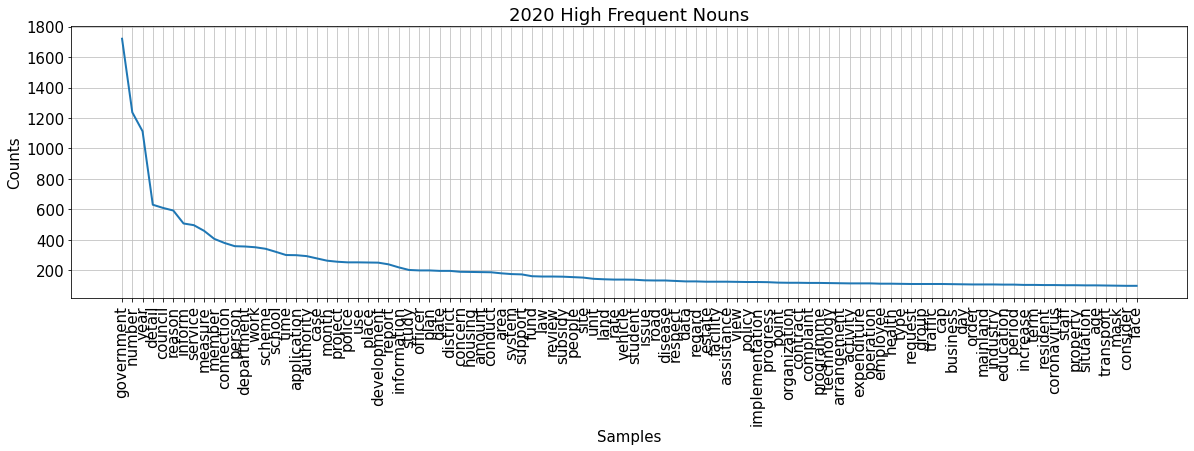

In [39]:
import pandas as pd
clean2020=open('/content/drive/MyDrive/★Project_prof.Jang/Hong Kong/data/clean2020.txt').read()
tokens=clean2020.split()
import re
re01=re.sub("[^a-zA-Z]", " ", clean2019)    # 영어 외 모두 제거

hansard_terms=['pm', 'ms', 'mr', 'minister', 'ministry', 'dr', 'prof.', 'speaker',
                'deputy', 'assoc.', 'sir', 'mp', 'mps', 'viii', 'vii', 'vi', 'v',
                'iv', 'iii', 'ii', 'i', 'hong', 'kong', 'e', 'g', 'ha']
clean = []
for word in tokens: 
  if word not in hansard_terms: 
      clean.append(word) 

tokens_tag=pos_tag(clean)
nouns2020=[word for word, pos in tokens_tag if pos in ['NN', 'NNS']]

'''아래 4행은 저장할 때만 쓰는 코드'''
nouns2020str=' '.join(nouns2020)
f=open('/content/drive/MyDrive/★Project_prof.Jang/Hong Kong/data/nouns2020.txt', 'w')
f.write(nouns2020str)
f.close()

plt.figure(figsize=(20, 5))              # changing the graph size
plt.rcParams.update({'font.size': 15})   # changing a font size
plt.title('2020 High Frequent Nouns')
Freq_dist_nltk = nltk.FreqDist(nouns2020)
Freq_dist_nltk.plot(100, cumulative=False)

In [40]:
print(nouns2019)
print(nouns2020)

['secretary', 'committee', 'party', 'china', 'point', 'report', 'cpc', 'congress', 'order', 'step', 'advance', 'democracy', 'sar', 'article', 'law', 'stipulate', 'aim', 'executive', 'ce', 'member', 'council', 'legco', 'suffrage', 'suffrage', 'situation', 'sar', 'accordance', 'principle', 'progress', 'december', 'month', 'election', 'government', 'consultation', 'method', 'select', 'ce', 'form', 'legco', 'election', 'month', 'government', 'inform', 'council', 'consider', 'launch', 'consultation', 'method', 'select', 'ce', 'form', 'legco', 'well', 'commence', 'step', 'process', 'assess', 'time', 'work', 'spirit', 'remark', 'aim', 'suffrage', 'sar', 'stipulate', 'law', 'ce', 'duty', 'visit', 'month', 'leader', 'authority', 'issue', 'reform', 'sar', 'detail', 'reason', 'cruise', 'build', 'cost', 'government', 'operation', 'year', 'commissioning', 'report', 'cruise', 'ship', 'call', 'day', 'year', 'couple', 'fact', 'transport', 'lack', 'facility', 'visit', 'tourist', 'member', 'terminal', '

In [70]:
texts = [nouns2020]
print(texts)

[['month', 'police', 'quantity', 'weapon', 'range', 'bullet', 'people', 'event', 'cause', 'casualty', 'frame', 'police', 'police', 'quantity', 'petrol', 'bomb', 'bomb', 'chemical', 'report', 'month', 'member', 'organization', 'demonstration', 'incident', 'cause', 'number', 'member', 'worry', 'law', 'order', 'situation', 'deteriorate', 'connection', 'government', 'inform', 'council', 'lethality', 'type', 'firearm', 'quantity', 'type', 'weapon', 'chemical', 'weapon', 'police', 'june', 'year', 'police', 'investigate', 'origin', 'firearm', 'weapon', 'connection', 'organization', 'action', 'authority', 'assessment', 'law', 'order', 'situation', 'strategy', 'violence', 'curb', 'disorder', 'prevent', 'activity', 'occurrence', 'disturbance', 'arise', 'amendment', 'number', 'person', 'police', 'officer', 'person', 'view', 'search', 'information', 'family', 'member', 'internet', 'information', 'others', 'family', 'member', 'person', 'view', 'silence', 'avoid', 'office', 'privacy', 'data', 'pcpd'

In [78]:
dictionary = corpora.Dictionary(texts)  # 딕셔너리 자료형으로 전환

corpus = [dictionary.doc2bow(text) for text in texts]   # generating doc-term matrix and save it to 'corpus'

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=8, id2word = dictionary)   # creating lda model, topics=8

ldamodel.print_topics(num_words=10)     # the number of words to print by topic

[(0,
  '0.025*"government" + 0.021*"year" + 0.019*"number" + 0.010*"council" + 0.010*"inform" + 0.010*"detail" + 0.009*"reason" + 0.008*"service" + 0.007*"measure" + 0.007*"member"'),
 (1,
  '0.039*"government" + 0.022*"year" + 0.016*"number" + 0.011*"reason" + 0.011*"detail" + 0.010*"inform" + 0.009*"measure" + 0.009*"service" + 0.008*"member" + 0.008*"council"'),
 (2,
  '0.032*"number" + 0.027*"government" + 0.013*"year" + 0.011*"detail" + 0.010*"council" + 0.009*"reason" + 0.009*"measure" + 0.007*"inform" + 0.007*"scheme" + 0.007*"department"'),
 (3,
  '0.034*"government" + 0.019*"number" + 0.016*"year" + 0.012*"detail" + 0.011*"reason" + 0.010*"council" + 0.009*"service" + 0.009*"measure" + 0.008*"work" + 0.007*"member"'),
 (4,
  '0.027*"government" + 0.025*"year" + 0.023*"number" + 0.012*"reason" + 0.012*"detail" + 0.011*"council" + 0.010*"service" + 0.010*"inform" + 0.008*"measure" + 0.008*"member"'),
 (5,
  '0.028*"government" + 0.022*"year" + 0.021*"number" + 0.010*"council" + 

In [72]:
ldamodel.get_document_topics(corpus)[0]   # 0번째 문서의 토픽의 분포:문서가 1개이므로 [0]밖에 없다

[(5, 0.97178626), (7, 0.020299857)]

In [73]:
# perplexity와 coherence 구하기

from gensim.models import CoherenceModel

print('\nPerplexity: ', ldamodel.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary,topn=100)
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.334555521995878

Coherence Score:  0.09693754002868124


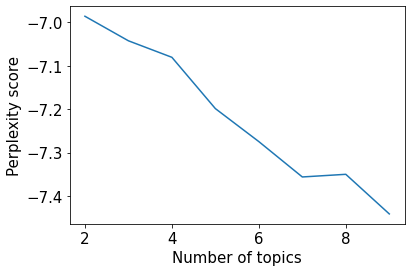

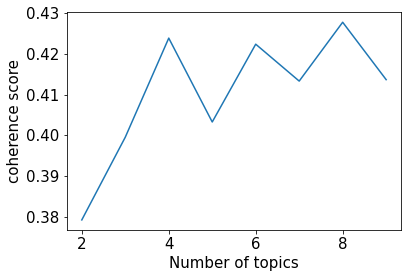

In [77]:
import matplotlib.pyplot as plt

perplexity_values = []
for i in range(2,10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

x = range(2,10)
plt.plot(x, perplexity_values)
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
plt.show()

coherence_values = []
for i in range(2,10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary,topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

x = range(2,10)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("coherence score")
plt.show()